In [1]:
import os
import tensorflow as tf
import numpy as np
import platform
import pathlib
import h5py
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from nets import mobilenet_v2 as mobilenet

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.5
Tensorflow version: 2.5.0
Keras version: 2.5.0


In [2]:
workspace_path = os.environ["WORKSPACE"] if "WORKSPACE" in os.environ else "/Users/watcharinsarachai/Documents/"
experiment_path = os.path.join(workspace_path, "_trained_models", "orchids2019", "mobilenet_v2_140_stn_v15_orchids52_0002", "experiments", "experiments-logits.h5")
experiment_path

'/Users/watcharinsarachai/Documents/_trained_models/orchids2019/mobilenet_v2_140_stn_v15_orchids52_0002/experiments/experiments.h5'

In [8]:
f = h5py.File(experiment_path, 'r')
dset = f['orchids52/experiments/test/logits']
dset

<HDF5 dataset "logits": shape (739, 53), type "<f4">

In [49]:
m = {}
for _d in dset:
    d = _d[:52]
    d = d - d.min()
    k = str(_d[52])
    if k not in m:
        m.update({k: [d]})
    else:
        arr = m.get(k)
        arr.append(d)

In [59]:
std = []
for k, v in m.items():
    l = len(v)
    d = np.sum(v, axis=0)/l
    #_ = plt.hist(d, bins='auto')
    norm = np.linalg.norm(d)
    nd = d/norm
    std.append(nd.std())

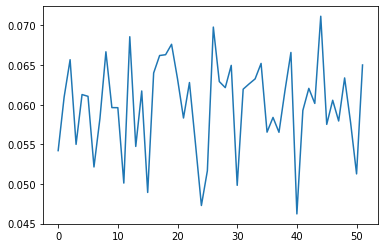

In [61]:
x = np.arange(0, 52)
plt.plot(x, std)

In [7]:
#plt.plot(x,mean)
#plt.plot(x,std)
plt.plot(x,dmin)
#plt.plot(x,dmax)
plt.show()

NameError: name 'dmin' is not defined